<a href="https://colab.research.google.com/github/Krish5118/Cancer/blob/main/cervical_jpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


  File Name                                          File Path  Width  Height  \
0   161.bmp  /content/drive/MyDrive/image cervical cancer/1...   2048    1536   
1   158.bmp  /content/drive/MyDrive/image cervical cancer/1...   2048    1536   
2   159.bmp  /content/drive/MyDrive/image cervical cancer/1...   2048    1536   
3   160.bmp  /content/drive/MyDrive/image cervical cancer/1...   2048    1536   
4   165.bmp  /content/drive/MyDrive/image cervical cancer/1...   2048    1536   

  Mode Format  
0  RGB    BMP  
1  RGB    BMP  
2  RGB    BMP  
3  RGB    BMP  
4  RGB    BMP  

Dataset Summary:
       File Name                                          File Path   Width  \
count         24                                                 24    24.0   
unique        24                                                 24     NaN   
top      161.bmp  /content/drive/MyDrive/image cervical cancer/1...     NaN   
freq           1                                                  1     NaN   
mean

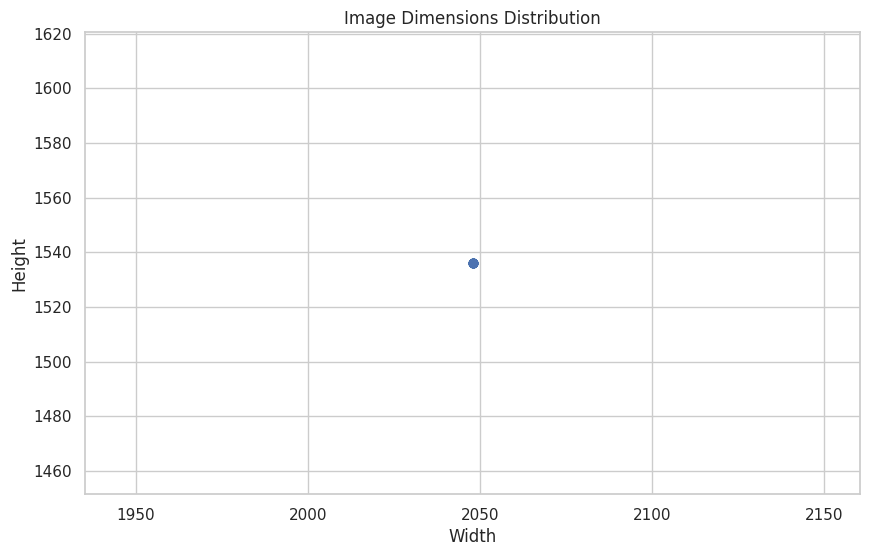

In [ ]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# Path to your dataset
dataset_path = "/content/drive/MyDrive/image cervical cancer"  # Changed to the parent directory

# List all files in the dataset directory
def get_dataset_info(path):
    file_info = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')):
                file_path = os.path.join(root, file)
                try:
                    # Open image to get basic details
                    with Image.open(file_path) as img:
                        file_info.append({
                            'File Name': file,
                            'File Path': file_path,
                            'Width': img.width,
                            'Height': img.height,
                            'Mode': img.mode,
                            'Format': img.format
                        })
                except Exception as e:
                    print(f"Error processing {file}: {e}")
    return pd.DataFrame(file_info)

# Generate dataset info
dataset_info = get_dataset_info(dataset_path)

# Display the first few rows
print(dataset_info.head())

# Save to CSV (optional)
dataset_info.to_csv('dataset_info.csv', index=False)

# Display basic stats
if not dataset_info.empty:  # Check if DataFrame is empty before calling describe()
    print("\nDataset Summary:")
    print(dataset_info.describe(include='all'))
else:
    print("\nDataset is empty. No summary statistics to display.")

# Plot the distribution of image dimensions
if not dataset_info.empty:  # Check if DataFrame is empty before plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(dataset_info['Width'], dataset_info['Height'], alpha=0.5)
    plt.title('Image Dimensions Distribution')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()
else:
    print("\nDataset is empty. No data to plot.")

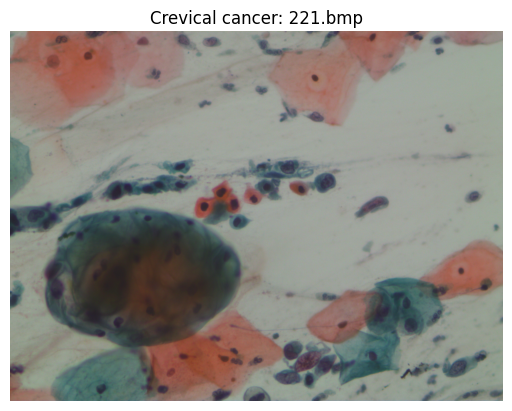

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the uploaded image
image_path = "/content/drive/MyDrive/image cervical cancer/001.bmp"

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title("Crevical cancer: 221.bmp")
plt.axis('off')  # Turn off axis
plt.show()

Accuracy: 1.00
Predictions: [0 0]


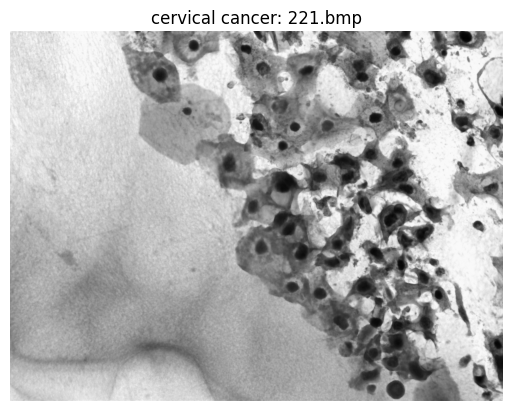

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the image
image_path = "/content/drive/MyDrive/image cervical cancer/158.bmp"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

# Resize the image to a fixed size (e.g., 64x64)
img_resized = cv2.resize(img, (64, 64))

# Flatten the image into a 1D array (feature vector)
img_flattened = img_resized.flatten()

# Create synthetic data for demonstration (replace with real data for training)
# Here we create dummy data where the uploaded image is one of the samples
num_samples = 10
X = np.random.rand(num_samples, 64 * 64)  # Random data
X[0] = img_flattened  # Insert the image as a feature vector
y = np.array([1] + [0] * (num_samples - 1))  # Assign a label (1 for the image, 0 for others)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
clf = svm.SVC(kernel='linear')  # You can experiment with other kernels like 'rbf'
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy:.2f}")
print(f"Predictions: {y_pred}")

# Display the original image
plt.imshow(img, cmap='gray')
plt.title("cervical cancer: 221.bmp")
plt.axis('off')
plt.show()

Accuracy: 0.00
Predictions: [0]


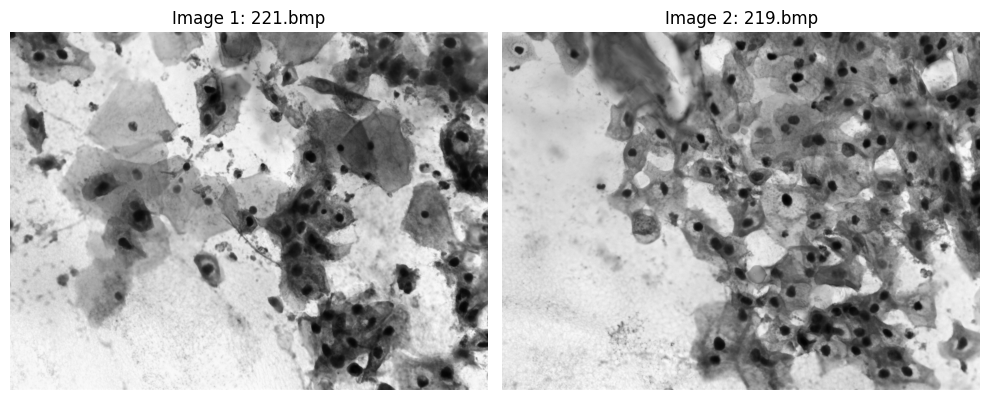

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to preprocess the images
def preprocess_image(image_path, size=(64, 64)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    img_resized = cv2.resize(img, size)  # Resize to 64x64
    return img_resized.flatten()  # Flatten to a 1D array

# Paths to the images
image_path1 = "/content/drive/MyDrive/image cervical cancer/160.bmp"
image_path2 = "/content/drive/MyDrive/image cervical cancer/161.bmp"

# Preprocess the images
img1_features = preprocess_image(image_path1)
img2_features = preprocess_image(image_path2)

# Combine images into a dataset (add more images or use a larger dataset as needed)
X = np.array([img1_features, img2_features])
y = np.array([0, 1])  # Labels (0 for img1, 1 for img2, modify as needed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Predictions: {y_pred}")

# Display the uploaded images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

ax[0].imshow(img1, cmap='gray')
ax[0].set_title("Image 1: 221.bmp")
ax[0].axis('off')

ax[1].imshow(img2, cmap='gray')
ax[1].set_title("Image 2: 219.bmp")
ax[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk("/content/drive/MyDrive/image cervical cancer"):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/content/drive/MyDrive/image cervical cancer/158.bmp
/content/drive/MyDrive/image cervical cancer/159.bmp
/content/drive/MyDrive/image cervical cancer/161.bmp
/content/drive/MyDrive/image cervical cancer/165.bmp
/content/drive/MyDrive/image cervical cancer/166.bmp
/content/drive/MyDrive/image cervical cancer/168.bmp
/content/drive/MyDrive/image cervical cancer/170.bmp
/content/drive/MyDrive/image cervical cancer/169.bmp
/content/drive/MyDrive/image cervical cancer/171.bmp
/content/drive/MyDrive/image cervical cancer/173.bmp
/content/drive/MyDrive/image cervical cancer/172.bmp
/content/drive/MyDrive/image cervical cancer/174.bmp
/content/drive/MyDrive/image cervical cancer/176.bmp
/content/drive/MyDrive/image cervical cancer/175.bmp
/content/drive/MyDrive/image cervical cancer/179.bmp
/content/drive/MyDrive/image cervical cancer/178.bmp
/content/drive/MyDrive/image cervical cancer/177.bmp
/content/drive/MyDrive/image cervical cancer/180.bmp
/content/drive/MyDrive/image cervical cancer/1

In [ ]:
from PIL import Image
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
base_dir ="/content/drive/MyDrive/image cervical cancer"
categories = ["im_Dyskeratotic", "im_Koilocytotic", "im_Metaplastic",
              "im_Parabasal", "im_Superficial-Intermediate"]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

In [ ]:
image_counts = {}

for category in categories:
    # Updated category path - Assuming CROPPED is directly within category folder
    category_path = os.path.join(base_dir, category, "/content/drive/MyDrive/image cervical cancer")  # Changed to the correct path

    # Check if the path exists to avoid FileNotFoundError
    if os.path.exists(category_path):
        image_counts[category] = len([f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))])
    else:
        print(f"Warning: Directory not found: {category_path}")
        image_counts[category] = 0  # Set count to 0 if directory not found

print(image_counts)

{'im_Dyskeratotic': 60, 'im_Koilocytotic': 60, 'im_Metaplastic': 60, 'im_Parabasal': 60, 'im_Superficial-Intermediate': 60}


<ipython-input-7-48cc915aeff1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette='viridis')


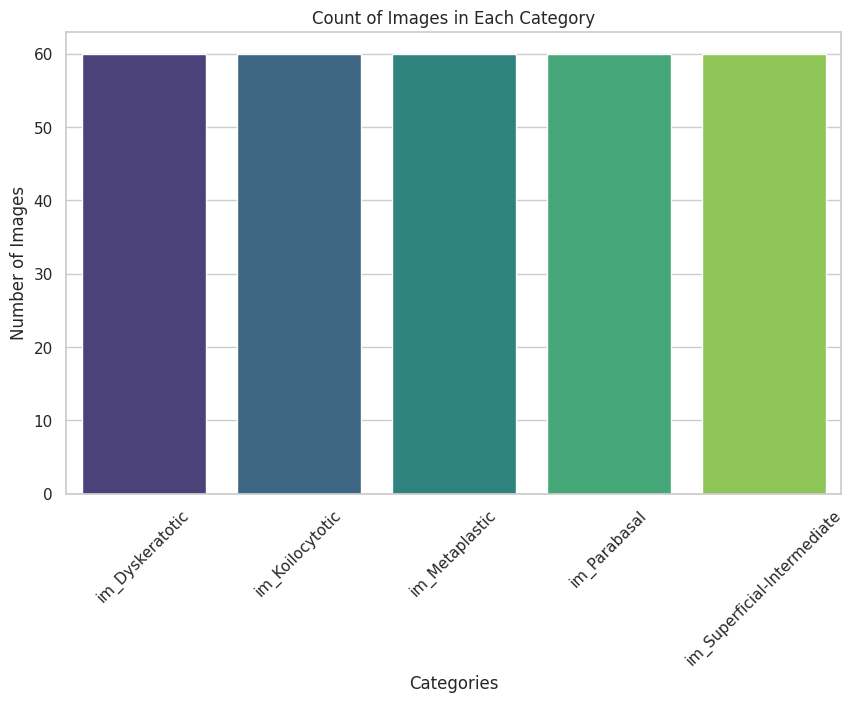

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette='viridis')
plt.title('Count of Images in Each Category')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

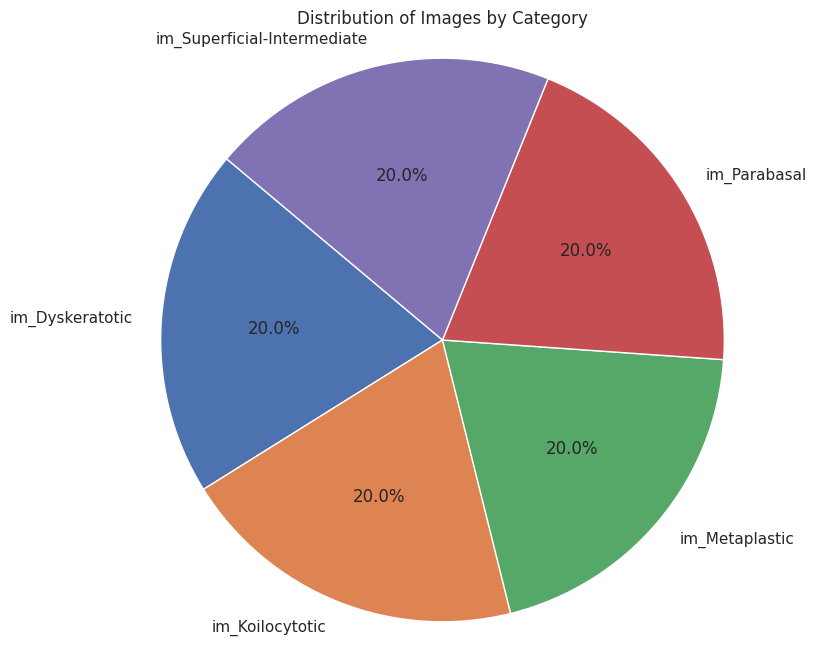

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(image_counts.values(), labels=image_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images by Category')
plt.axis('equal')
plt.show()
print("Warning: All image counts are zero. No plots generated.")# Removed extra indentation (2 spaces)

In [ ]:
import cv2

In [ ]:
def display_images_from_folders(base_dir, categories, num_images=5):
    plt.figure(figsize=(15, 10))

    for i, category in enumerate(categories):
        # Corrected category path - Assuming CROPPED is directly within category folder
        category_path = os.path.join(base_dir, category, "/content/drive/MyDrive/image cervical cancer")  # Changed to the correct path

        # Check if the path exists before proceeding
        if os.path.exists(category_path):
            image_files = [f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))]

            for j, image_file in enumerate(image_files[:num_images]):

                img_path = os.path.join(category_path, image_file)
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

                plt.subplot(len(categories), num_images, i * num_images + j + 1)
                plt.imshow(image)
                plt.axis('off')
                plt.title(f"{category}")
        else:
            print(f"Warning: Directory not found: {category_path}")

    plt.tight_layout()
    plt.show()

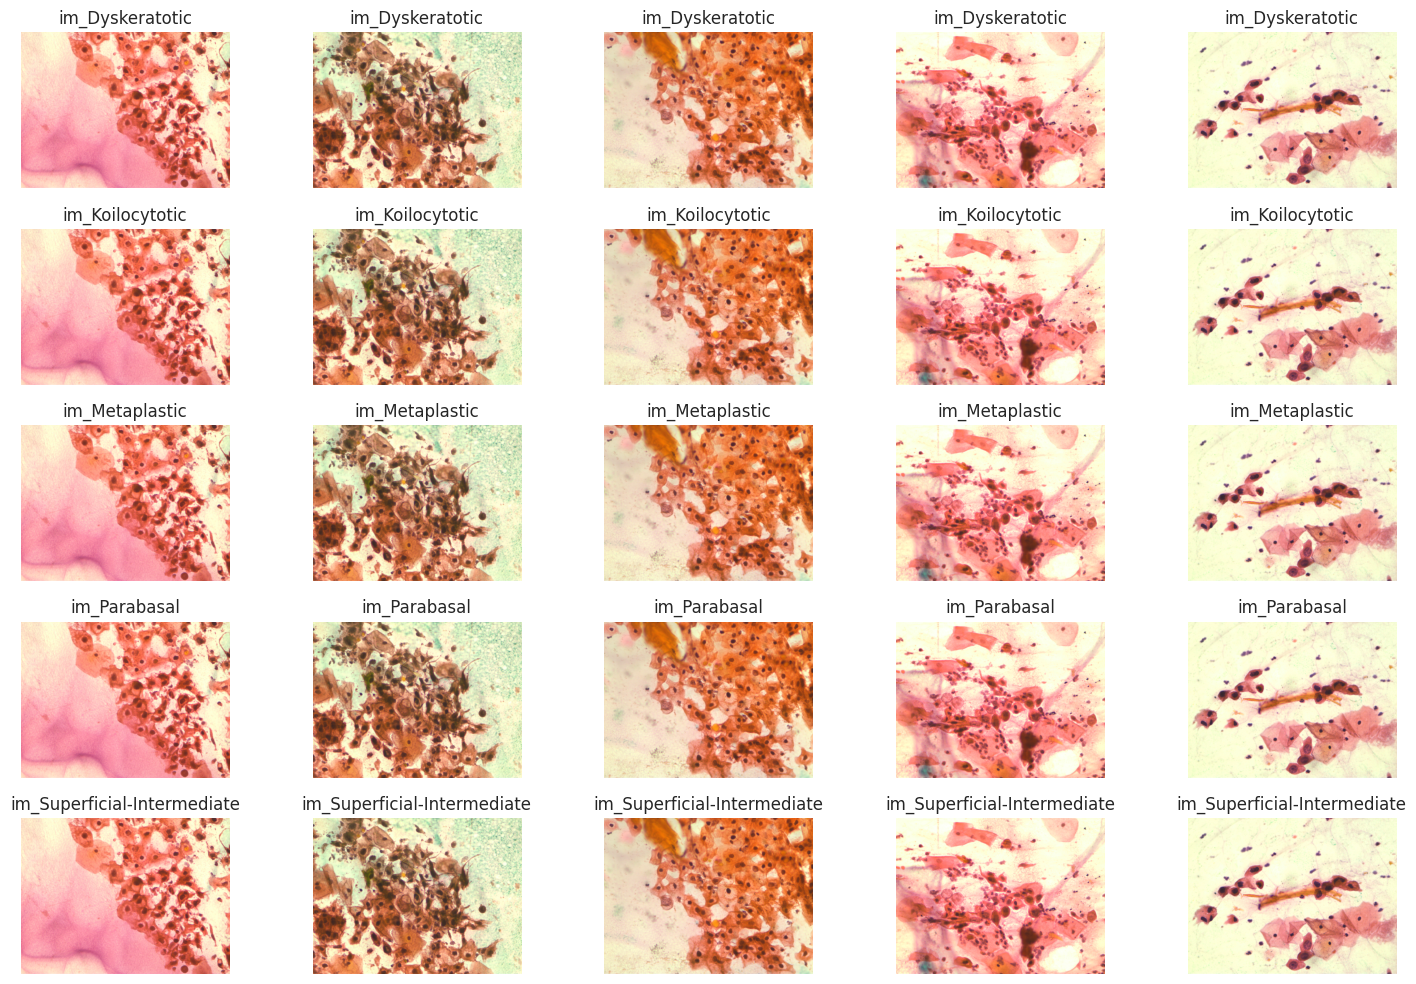

In [ ]:
display_images_from_folders(base_dir, categories, num_images=5)

In [ ]:
import os
import pandas as pd

def create_image_paths_dataframe(base_dir, categories):
    data = []

    for category in categories:
        # Corrected category path - Assuming CROPPED is directly within category folder
        category_path = os.path.join(base_dir, category, "CROPPED")  # Changed to the correct path

        # Check if the path exists before proceeding
        if os.path.exists(category_path):
            image_files = [f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))]

            for image_file in image_files:
                img_path = os.path.join(category_path, image_file)
                data.append({'image_path': img_path, 'label': category})
        else:
            print(f"Warning: Directory not found: {category_path}")  # Print a warning if the directory is not found

    df_image_paths = pd.DataFrame(data)

    return df_image_paths

In [ ]:
df_image_paths = create_image_paths_dataframe(base_dir, categories)

In [ ]:
df_image_paths.head()

Empty DataFrame
Columns: []
Index: []

In [ ]:
df_image_paths.tail()

Empty DataFrame
Columns: []
Index: []

In [ ]:
df_image_paths['label'].unique()

KeyError: 'label'

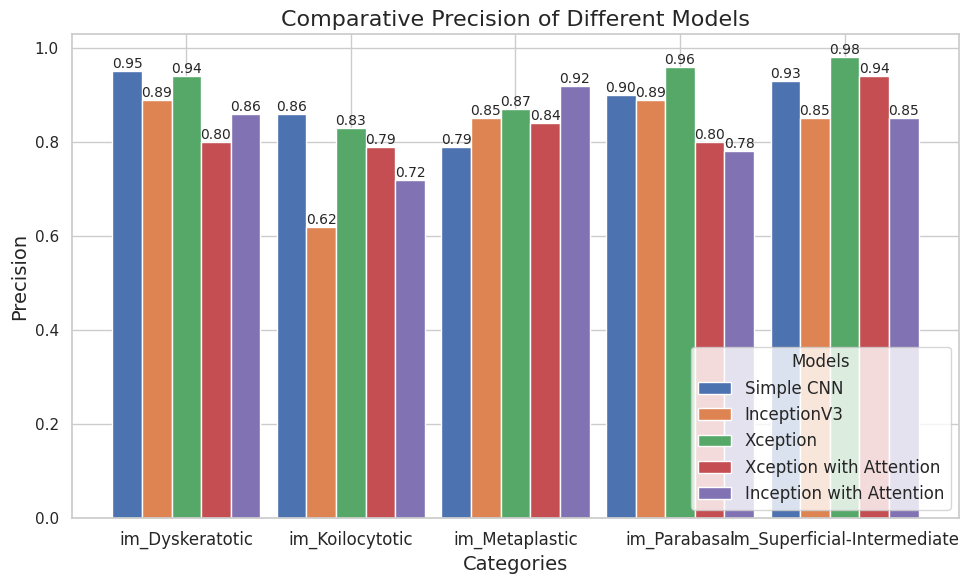

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = {
    'Category': [
        'im_Dyskeratotic',
        'im_Koilocytotic',
        'im_Metaplastic',
        'im_Parabasal',
        'im_Superficial-Intermediate'
    ],
    'Simple CNN': [0.95, 0.86, 0.79, 0.90, 0.93],
    'InceptionV3': [0.89, 0.62, 0.85, 0.89, 0.85],
    'Xception': [0.94, 0.83, 0.87, 0.96, 0.98],
    'Xception with Attention': [0.80, 0.79, 0.84, 0.80, 0.94],
    'Inception with Attention': [0.86, 0.72, 0.92, 0.78, 0.85]
}

df = pd.DataFrame(data)
df.set_index('Category', inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.18
x = np.arange(len(df.index))

for i, model in enumerate(df.columns):
    bars = ax.bar(x + i * bar_width, df[model], width=bar_width, label=model)
    for bar in bars:
        yval = bar.get_height()
        ax.annotate(f'{yval:.2f}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                    ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.set_title('Comparative Precision of Different Models', fontsize=16)
ax.set_xticks(x + bar_width * 2)
ax.set_xticklabels(df.index, fontsize=12)
ax.legend(title='Models', fontsize=12, loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
data=("/content/drive/MyDrive/vedio")

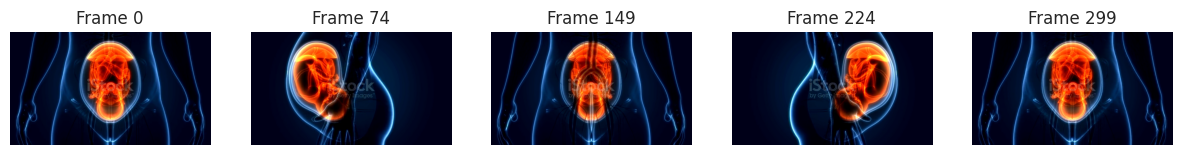

In [ ]:
import cv2
import matplotlib.pyplot as plt

def display_video_frames(video_path, num_frames=5):
  cap = cv2.VideoCapture(video_path)
  total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frame_indices = np.linspace(0, total_frames - 1, num_frames, dtype=int)

  fig, axes = plt.subplots(1, num_frames, figsize=(15, 5))

  for i, frame_index in enumerate(frame_indices):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
    ret, frame = cap.read()
    if ret:
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib
      axes[i].imshow(frame)
      axes[i].set_title(f"Frame {frame_index}")
      axes[i].axis("off")
    else:
      print(f"Error reading frame {frame_index}")

  plt.show()
  cap.release()

# Example usage:
video_path = "/content/drive/MyDrive/vedio/istockphoto-1162482099-640_adpp_is.mp4"
display_video_frames(video_path)

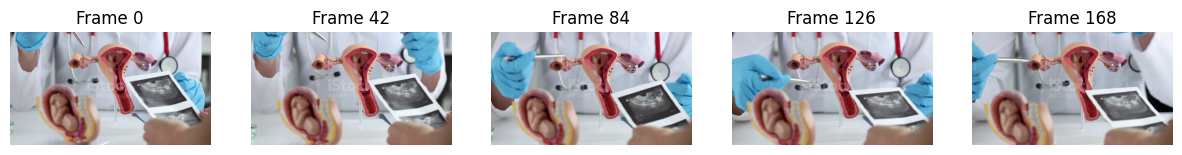

In [ ]:
video_path = "/content/drive/MyDrive/vedio/istockphoto-1367118118-640_adpp_is.mp4"  # Replace with the actual path
display_video_frames(video_path)

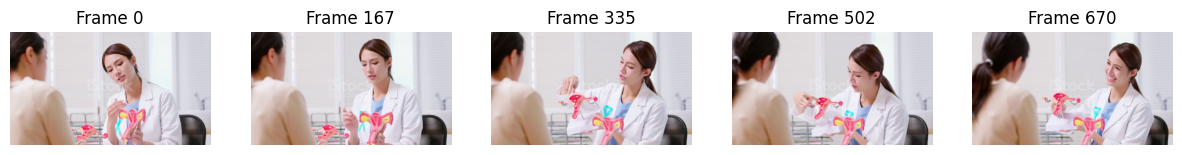

In [ ]:
video_path = "/content/drive/MyDrive/vedio/istockphoto-1406907761-640_adpp_is.mp4"  # Replace with the actual path
display_video_frames(video_path)

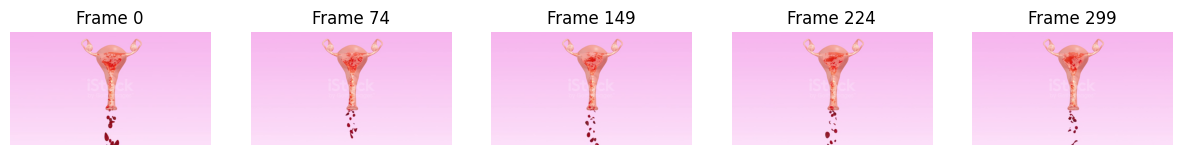

In [ ]:
video_path = "/content/drive/MyDrive/vedio/istockphoto-2147518587-640_adpp_is.mp4"  # Replace with the actual path
display_video_frames(video_path)

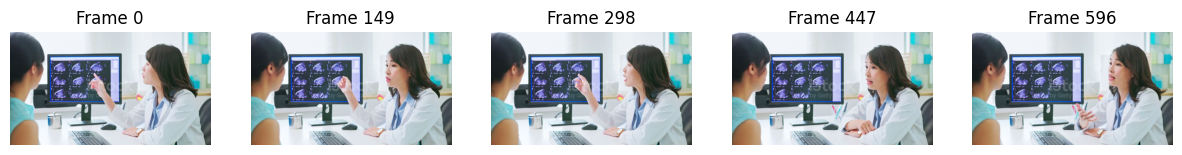

In [ ]:
video_path = "/content/drive/MyDrive/vedio/istockphoto-2152923398-640_adpp_is.mp4"  # Replace with the actual path
display_video_frames(video_path)

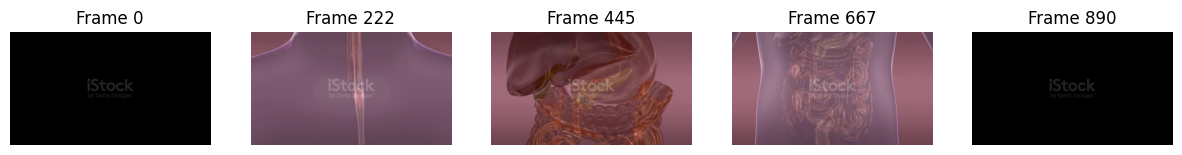

In [ ]:
video_path = "/content/drive/MyDrive/vedio/istockphoto-458701154-640_adpp_is.mp4"  # Replace with the actual path
display_video_frames(video_path)

Error reading frame 2097
Error reading frame 2797


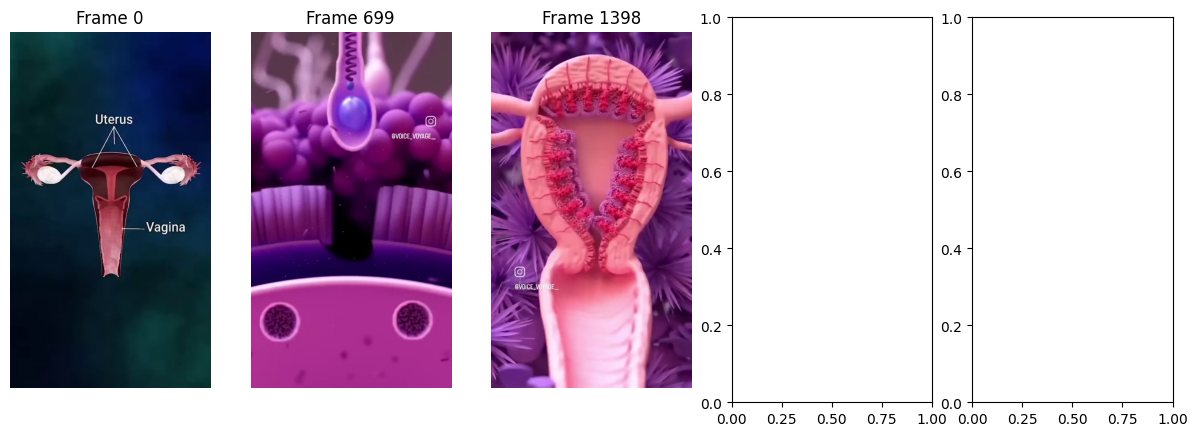

In [ ]:
video_path = "/content/drive/MyDrive/vedio/WhatsApp Video 2025-02-10 at 21.23.27_5976bf74.mp4"  # Replace with the actual path
display_video_frames(video_path)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 1. Define the model
model = keras.Sequential([
    keras.layers.Conv3D(32, (3, 3, 3), activation='relu', input_shape=(16, 128, 128, 3)),  # Adjust input shape
    keras.layers.MaxPooling3D((2, 2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')  # Adjust number of classes
])

# 2. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

video_data = np.random.rand(10, 16, 128, 128, 3)  # Replace with your actual data
labels = np.random.randint(0, 10, size=10)  # Replace with your actual labels

# 4. Train the model
model.fit(video_data, labels, epochs=10)  # Adjust epochs as needed

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0000e+00 - loss: 2.3098
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.5000 - loss: 42.1450
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3000 - loss: 59.6364
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.3000 - loss: 45.9338
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.4000 - loss: 32.4794
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.4000 - loss: 25.5013
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.7000 - loss: 10.0469
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.6000 - loss: 8.4090
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.8000 - loss: 5.0824
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.9000 - loss: 1.4777


new
